# 나이브 베이즈 분류 모형

나이브 베이즈 분류 모형(Naive Bayes classification model)은 대표적인 확률적 생성 모형이다. 

타겟 변수 $y$의 각 클래스 $\{C_1,\cdots,C_K\}$ 에 대한 독립 변수 $x$의 조건부 확률 분포 정보 $p(x \mid y = C_k)$ 를 사용하여 주어진 새로운 독립 변수 값 $x_{\text{new}}$에 대한 타켓 변수의 각 클래스의 조건부 확률 $p(y = C_k \mid x_{\text{new}})$ 를 추정한 후 가장 조건부 확률이 큰 클래스 $k$를 선택하는 방법이다.



## 조건부 확률의 계산

다음과 같이 베이즈 규칙을 사용하여 조건부 확률 $p(y = C_k \mid x_{\text{new}})$ 을 계산한다.

$$
P(y = C_k \mid x_{\text{new}}) = \dfrac{P(x_{\text{new}} \mid y = C_k)\; P(y = C_k)}{P(x_{\text{new}})}
$$

최종적으로는 각 클래스 $k$에 대한 확률을 비교하여 최고값을 계산하기만 하면 되므로 분모에 있는 주변 확률(marginal probability) ${P(x_{\text{new}})}$은 계산하지 않는다.

$$
P(y = C_k \mid x_{\text{new}}) \;\; \propto \;\; P(x_{\text{new}} \mid y = C_k) \; P(y = C_k)
$$


여기에서 사전 확률(prior) $P(y = C_k)$는 다음과 같이 쉽게 구할 수 있다.

$$
P(y = C_k) \approx \frac{\text{number of samples with }y = C_k}{\text{number of all samples}}
$$

$y$에 대한 $x$의 조건부 확률인 우도(likelihood)의 경우에는 일반적으로 정규 분포나 베르누이 분포와 같은 특정한 모형을 가정하여 다음과 같이 계산한다.

1. $P(x \mid y = C_k)$ 가 특정한 확률 분포 모형을 따른다고 가정한다.
2. 트레이닝 데이터 $\{x_1, \cdots, x_N\}$을 사용하여 이 모형의 모수(parameter)를 구한다.
3. 모수를 알고 있으므로 새로운 독립 변수 값 $x_{\text{new}}$이 어떤 값이 되더라도 $P(x_{\text{new}} \mid y = C_k)$ 를 계산할 수 있다.

## 우도 모형

우도의 모형으로 많이 사용하는 것은 다음과 같다.

* 베르누이 분포
  * $x$가 0 또는 1 값만을 가질 수 있다.
  * $x$가 1 이 될 확률은 고정되어 있다.
  * 예: 동전을 던진 결과로 어느 동전을 던졌는지를 찾아내는 모형
  
$$ P(x_i \mid y = C_k) = \theta_k^x (1-\theta_k)^{(1-x_i)} $$


* 다항 분포 
  * $(x_1, \ldots, x_n)$ 이 0 또는 양의 정수
  * 예: 주사위를 던진 결과로 어느 주사위를 던졌는지를 찾아내는 모형

$$ P(x_1, \ldots, x_n \mid y = C_k) = \prod_i \theta_k^{x_i}$$


* 가우시안 정규 분포
  * $x$가 실수로 특정한 값 근처
  * 예: 시험 점수로 학생이 누구인지를 찾아내는 모형
  
  $$ P(x_i \mid y = C_k) = \dfrac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left(-\dfrac{(x_i-\mu_k)^2}{2\sigma_k^2}\right) $$
  

## 나이브 가정

독립 변수 $x$가 다차원(multi-dimensional) $x = (x_1, \ldots, x_n)$ 이면 위에서 사용한 우도 $P(x \mid y = C_k)$  는 원래 모든 $x_i$에 대한 결합 확률(joint probability) $P(x_1, \ldots, x_n \mid y = C_k)$ 을 사용해야 한다. 그러나 이러한 결합 확률은 실제로 입수하기 어렵기 때문에 모든 차원의 개별 독립 변수 요소들이 서로 독립(independent)이라는 가정을 흔히 사용한다. 이러한 가정을 나이브 가정(Naive assumption)이라고 한다.

나이브 가정하에서는 결합 확률이 개별 확률의 곱으로 나타난다.

$$
P(x_1, \ldots, x_n \mid y = C_k) = \prod_{i=1}^n P(x_i \mid y = C_k)
$$



$$
P(y = C_k \mid x_{\text{new}}) \;\; \propto \;\; \prod_{i=1}^n P(x_{\text{new},i} \mid y = C_k)\; P(y = C_k)
$$


## Scikit-Learn에서 제공하는 나이브 베이즈 모형

Scikit-Learn의 naive_bayes 서브패키지에서는 다음과 같은 세가지 나이브 베이즈 모형 클래스를 제공한다.

* [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html): 베르누이 분포 나이브 베이즈
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html): 다항 분포 나이브 베이즈
* [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):	가우시안 정규 분포 나이브 베이즈

이 클래스들은 다음과 같은 속성값 및 메서드를 가진다.

* `classes_`: 공통

 * 타겟 Y의 클래스(라벨)


* `class_count_`: 공통

 * 타겟 Y의 값이 특정한 클래스인 표본 데이터의 수


* `feature_count_`: 베르누이 분포나 다항 분포 

 * 타겟 Y의 값이 특정한 클래스이면서 독립 변수 X의 값이 1인 표본 데이터의 수 (베르누이 분포).
 * 타겟 Y의 값이 특정한 클래스인 독립 변수 X의 값의 합 (다항 분포). 독립 변수 값이 1또는 0만 가지는 경우에는 표본 데이터의 수가 된다. 
 

* `class_prior_`: 가우시안 정규 분포

 * 타겟 Y의 무조건부 확률 분포 $ P(Y) $
 

* `class_log_prior_`: 베르누이 분포나 다항 분포 

 * 타겟 Y의 무조건부 확률 분포의 로그 $ \log P(Y) $
 

* `theta_ `, `sigma_` : 가우시안 정규 분포

 * 가우시안 정규 분포의 기댓값 $\mu$ 과 분산 $\sigma^2$
 

* `feature_log_prob_ `: 베르누이 분포나 다항 분포 

 * 베르누이 분포 혹은 다항 분포의 모수 벡터의 로그
 $$ \log \theta = (\log \theta_1, \ldots, \log \theta_n) = \left( \log \dfrac{N_i}{N}, \ldots, \log \dfrac{N_n}{N} \right)$$
 
 * 스무딩(smoothing)
 $$ \hat{\theta} = \frac{ N_{i} + \alpha}{N + \alpha n} $$ 
 
* `predict_proba(x_new)` : 공통

 * 조건부 확률 분포 $ P(Y \mid X_{\text{new}}) $

## 가우시안 정규 분포 나이브 베이즈 모형

In [5]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
np.random.seed(0)
X0 = sp.stats.norm(-2, 1).rvs(40)
X1 = sp.stats.norm(+2, 1).rvs(60)
X = np.hstack([X0, X1])[:, np.newaxis]
y0 = np.zeros(40)
y1 = np.ones(60)
y = np.hstack([y0, y1])

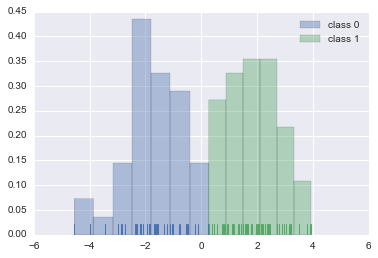

In [7]:
sns.distplot(X0, rug=True, kde=False, norm_hist=True, label="class 0")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, label="class 1")
plt.legend()
plt.xlim(-6,6)
plt.show()

In [8]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(X, y)

In [9]:
clf_norm.classes_

array([ 0.,  1.])

In [10]:
clf_norm.class_count_

array([ 40.,  60.])

In [11]:
clf_norm.class_prior_

array([ 0.4,  0.6])

In [12]:
clf_norm.theta_, clf_norm.sigma_

(array([[-1.68745753],
        [ 1.89131838]]), array([[ 1.13280656],
        [ 0.8668681 ]]))

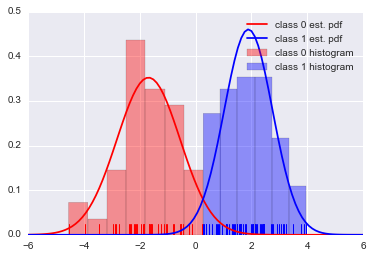

In [13]:
xx = np.linspace(-6, 6, 100)
p0 = sp.stats.norm(clf_norm.theta_[0], clf_norm.sigma_[0]).pdf(xx)
p1 = sp.stats.norm(clf_norm.theta_[1], clf_norm.sigma_[1]).pdf(xx)                                                               
sns.distplot(X0, rug=True, kde=False, norm_hist=True, color="r", label="class 0 histogram")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, color="b", label="class 1 histogram")
plt.plot(xx, p0, c="r", label="class 0 est. pdf")
plt.plot(xx, p1, c="b", label="class 1 est. pdf")
plt.legend()
plt.show()

In [14]:
x_new = -1
clf_norm.predict_proba([[x_new]])

array([[ 0.98327446,  0.01672554]])

In [15]:
px = sp.stats.norm(clf_norm.theta_, np.sqrt(clf_norm.sigma_)).pdf(x_new)
px

array([[ 0.30425666],
       [ 0.00345028]])

In [16]:
p = px.flatten() * clf_norm.class_prior_
p

array([ 0.12170266,  0.00207017])

In [17]:
clf_norm.class_prior_

array([ 0.4,  0.6])

In [18]:
p / p.sum()

array([ 0.98327446,  0.01672554])

## 베르누이 분포 나이브 베이즈 모형

베르누이 나이브 베이즈 모형에서는 타겟 변수뿐 아니라 독립 변수도 0 또는 1의 값을 가져야 한다. 예를 들어 전자우편과 같은 문서 내에 특정한 단어가 포함되어 있는지의 여부는 베르누이 확률 변수로 모형화할 수 있으므로 스팸 필터링에 사용할 수 있다.

In [14]:
np.random.seed(0)
X = np.random.randint(2, size=(10, 4))
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[0 1 1 0]
 [1 1 1 1]
 [1 1 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 1 0]
 [1 0 1 1]
 [0 1 1 0]]
[0 0 0 0 1 1 1 1 1 1]


In [15]:
from sklearn.naive_bayes import BernoulliNB
clf_bern = BernoulliNB().fit(X, y)

In [16]:
clf_bern.classes_

array([0, 1])

In [17]:
clf_bern.class_count_

array([ 4.,  6.])

In [18]:
np.exp(clf_bern.class_log_prior_)

array([ 0.4,  0.6])

In [19]:
fc = clf_bern.feature_count_
fc

array([[ 2.,  4.,  3.,  1.],
       [ 2.,  3.,  5.,  3.]])

In [20]:
fc / np.repeat(clf_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[ 0.5       ,  1.        ,  0.75      ,  0.25      ],
       [ 0.33333333,  0.5       ,  0.83333333,  0.5       ]])

In [21]:
theta = np.exp(clf_bern.feature_log_prob_)
theta

array([[ 0.5       ,  0.83333333,  0.66666667,  0.33333333],
       [ 0.375     ,  0.5       ,  0.75      ,  0.5       ]])

In [22]:
x_new = np.array([1, 1, 0, 0])

In [23]:
clf_bern.predict_proba([x_new])

array([[ 0.72480181,  0.27519819]])

In [24]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.72480181,  0.27519819])

In [25]:
x_new = np.array([0, 0, 1, 1])

In [26]:
clf_bern.predict_proba([x_new])

array([[ 0.09530901,  0.90469099]])

In [27]:
p = ((theta**x_new)*(1-theta)**(1-x_new)).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.09530901,  0.90469099])

## 다항 분포 나이브 베이즈 모형

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf_mult = MultinomialNB().fit(X, y)

In [29]:
clf_mult.classes_

array([0, 1])

In [30]:
clf_mult.class_count_

array([ 4.,  6.])

In [31]:
fc = clf_mult.feature_count_
fc

array([[ 2.,  4.,  3.,  1.],
       [ 2.,  3.,  5.,  3.]])

In [32]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[ 0.2       ,  0.4       ,  0.3       ,  0.1       ],
       [ 0.15384615,  0.23076923,  0.38461538,  0.23076923]])

In [33]:
clf_mult.alpha

1.0

In [34]:
(fc + clf_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + clf_mult.alpha * X.shape[1])

array([[ 0.21428571,  0.35714286,  0.28571429,  0.14285714],
       [ 0.17647059,  0.23529412,  0.35294118,  0.23529412]])

In [35]:
theta = np.exp(clf_mult.feature_log_prob_)
theta

array([[ 0.21428571,  0.35714286,  0.28571429,  0.14285714],
       [ 0.17647059,  0.23529412,  0.35294118,  0.23529412]])

In [36]:
x_new = np.array([21, 35, 29, 14])
clf_mult.predict_proba([x_new])

array([[ 0.99431066,  0.00568934]])

In [37]:
p = (theta**x_new).prod(axis=1)*np.exp(clf_bern.class_log_prior_)
p / p.sum()

array([ 0.99431066,  0.00568934])

In [38]:
x_new = np.array([18, 24, 35, 24])
clf_mult.predict_proba([x_new])

array([[ 0.00189418,  0.99810582]])

## 예 1: 뉴스 그룹

In [39]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cross_validation import train_test_split
news = fetch_20newsgroups(subset="all")
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.1, random_state=1)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf_1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('clf', MultinomialNB()),
        ])
clf_2 = Pipeline([
            ('vect', TfidfVectorizer()),
            ('clf', MultinomialNB()),
        ])
clf_3 = Pipeline([
            ('vect', TfidfVectorizer(token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB()),
        ])
clf_4 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB()),
        ])
clf_5 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=ur"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB(alpha=0.01)),
        ])

In [41]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

for i, clf in enumerate([clf_1, clf_2, clf_3, clf_4, clf_5]):
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    print(("Model {0:d}: Mean score: {1:.3f} (+/-{2:.3f})").format(i, np.mean(scores), sem(scores)))

Model 0: Mean score: 0.607 (+/-0.005)
Model 1: Mean score: 0.548 (+/-0.013)
Model 2: Mean score: 0.614 (+/-0.008)
Model 3: Mean score: 0.741 (+/-0.004)
Model 4: Mean score: 0.808 (+/-0.008)


## 감성 분석 Sentiment Analysis

* 서울대 박은정님의 네이버 영화 감상평에 대한 감성 분석 예제
 * https://github.com/e9t/nsmc
 * https://www.lucypark.kr/slides/2015-pyconkr/

### 데이터 전처리

In [42]:
import codecs
def read_data(filename):
    with codecs.open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data
train_data = read_data('/home/dockeruser/data/nsmc/ratings_train.txt')
test_data = read_data('/home/dockeruser/data/nsmc/ratings_test.txt')

In [43]:
X = zip(*train_data)[1]
y = zip(*train_data)[2]
y = np.array(y, dtype=int)

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, test_size=10000)
len(X_train), len(X_test)

(10000, 10000)

In [45]:
from konlpy.utils import pprint
pprint((X[0], y[0]))

(아 더빙.. 진짜 짜증나네요 목소리,
 0)


In [46]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

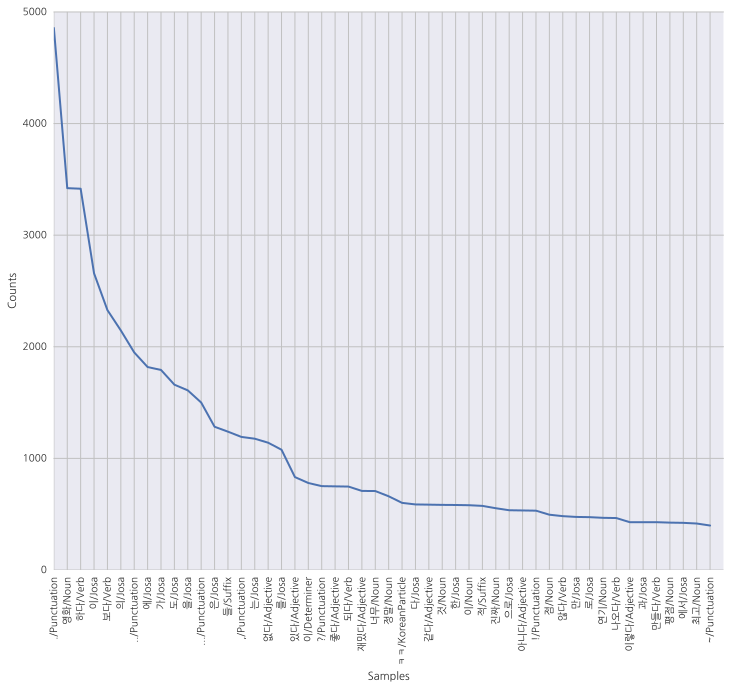

CPU times: user 16.3 s, sys: 260 ms, total: 16.5 s
Wall time: 17.8 s


In [47]:
%%time
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

train_docs = [(tokenize(row[1]), row[2]) for row in train_data[:10000]]
tokens = [t for d in train_docs for t in d[0]]
import nltk
text = nltk.Text(tokens, name='NMSC')
mpl.rcParams["font.family"] = "NanumGothic"
plt.figure(figsize=(12,10))
text.plot(50)
plt.show()

### CountVectorize 사용

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf_1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('clf', MultinomialNB()),
        ])

In [49]:
%%time 
clf_1.fit(X_train, y_train)

CPU times: user 170 ms, sys: 0 ns, total: 170 ms
Wall time: 184 ms


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [50]:
pprint(list(clf_1.named_steps["vect"].vocabulary_)[:10])

[진심이라는걸,
 더하여,
 담백하지도,
 죠스,
 진중한,
 1화부터,
 수준엔,
 앞으론,
 예상밖에,
 천사야]


In [51]:
%%time 
print(classification_report(y_test, clf_1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.76      0.79      0.77      5018
          1       0.78      0.75      0.76      4982

avg / total       0.77      0.77      0.77     10000

CPU times: user 100 ms, sys: 0 ns, total: 100 ms
Wall time: 101 ms


### TfidfVectorizer 사용

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

clf_2 = Pipeline([
            ('vect', TfidfVectorizer()), 
            ('clf', MultinomialNB()),
        ])

In [53]:
%%time 
clf_2.fit(X_train, y_train)

CPU times: user 190 ms, sys: 10 ms, total: 200 ms
Wall time: 200 ms


Pipeline(steps=[('vect', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [54]:
%%time 
print(classification_report(y_test, clf_2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.75      0.80      0.78      5018
          1       0.79      0.74      0.76      4982

avg / total       0.77      0.77      0.77     10000

CPU times: user 110 ms, sys: 0 ns, total: 110 ms
Wall time: 104 ms


### 형태소 분석기 사용

In [55]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

clf_3 = Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize_pos)), 
            ('clf', MultinomialNB()),
        ])

In [56]:
%%time 
clf_3.fit(X_train, y_train)

CPU times: user 9.03 s, sys: 0 ns, total: 9.03 s
Wall time: 9.05 s


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...08>,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [57]:
pprint(list(clf_3.named_steps["vect"].vocabulary_)[:10])

[찮음/Noun,
 자막/Noun,
 고래/Noun,
 깔끔하다/Adjective,
 강간/Noun,
 하재영/Noun,
 꽉/Noun,
 건방지다/Adjective,
 마감/Noun,
 잘봣어/Noun]


In [58]:
%%time 
print(classification_report(y_test, clf_3.predict(X_test), digits=4))

             precision    recall  f1-score   support

          0     0.8150    0.8340    0.8244      5018
          1     0.8288    0.8093    0.8189      4982

avg / total     0.8219    0.8217    0.8217     10000

CPU times: user 9.3 s, sys: 0 ns, total: 9.3 s
Wall time: 9.33 s


In [59]:
vect3 = clf_3.named_steps["vect"]
idx3 = np.array(np.argsort(vect3.transform(X_train).sum(axis=0)))[0]
voca3 = np.array(vect3.get_feature_names()).flatten()
pprint(voca3[idx3[-20:]].tolist())

[되다/Verb,
 있다/Adjective,
 를/Josa,
 없다/Adjective,
 ,/Punctuation,
 는/Josa,
 들/Suffix,
 은/Josa,
 .../Punctuation,
 을/Josa,
 도/Josa,
 가/Josa,
 에/Josa,
 ../Punctuation,
 의/Josa,
 보다/Verb,
 이/Josa,
 하다/Verb,
 영화/Noun,
 ./Punctuation]


### 최적화

In [60]:
clf_4 = Pipeline([
            ('vect', TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,2))), 
            ('clf', MultinomialNB()),
        ])

In [61]:
%%time 
clf_4.fit(X_train, y_train)

CPU times: user 9.56 s, sys: 40 ms, total: 9.6 s
Wall time: 9.63 s


Pipeline(steps=[('vect', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=True...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [62]:
%%time 
print(classification_report(y_test, clf_4.predict(X_test), digits=4))

             precision    recall  f1-score   support

          0     0.8191    0.8593    0.8387      5018
          1     0.8509    0.8089    0.8294      4982

avg / total     0.8350    0.8342    0.8341     10000

CPU times: user 9.38 s, sys: 20 ms, total: 9.4 s
Wall time: 9.41 s
